In [2]:
from altered_states2 import Grid
import matplotlib.pyplot as plt
from itertools import combinations
import random

POPULATION_SIZE = 1000
TERMINAL_FITNESS = 330759736
MAX_GENERATIONS = 200
GENERATION_CUTOFF = 0.75 # percentage that won't survive to the next generation
CROSSOVER_BALANCE = 7 # the higher the value, the closer to 50/50 the genetics of the child are
MUTATION_RATE = 0.3 # the chance of in-utero mutation


In [4]:
def population_fitness_statistics(population):
    fitnesses = [g.fitness for g in population]
    plt.stem(fitnesses)
    plt.show()
    print(f"Average fitness: {sum(fitnesses)/len(fitnesses)}\n")

def print_individual(grid, name):
    print(f"{name} grid:")
    grid.print_grid()
    print(grid.states)
    print(grid.fitness)

def plot_fitnesses_over_gens(max_fitnesses):
    plt.plot(max_fitnesses)
    plt.show()
    

In [8]:
def propagate_next_generation(population, cutoff):
    next_generation = population[cutoff:]
    #next_generation = [individual for individual in population if individual.fitness > cutoff]
    empty_capacity = POPULATION_SIZE - len(next_generation)
    possible_pairs = list(combinations(next_generation, 2))
    num_combos = len(possible_pairs)
    if empty_capacity > num_combos:
        (q, r) = divmod(empty_capacity, num_combos)
        selected_pairs = q * possible_pairs + possible_pairs[:r]
    else:
        selected_pairs = random.sample(possible_pairs, empty_capacity)
    newborns = [parent1.cross(parent2, CROSSOVER_BALANCE, MUTATION_RATE) for (parent1, parent2) in selected_pairs]
    return next_generation + newborns

GENERATION 0


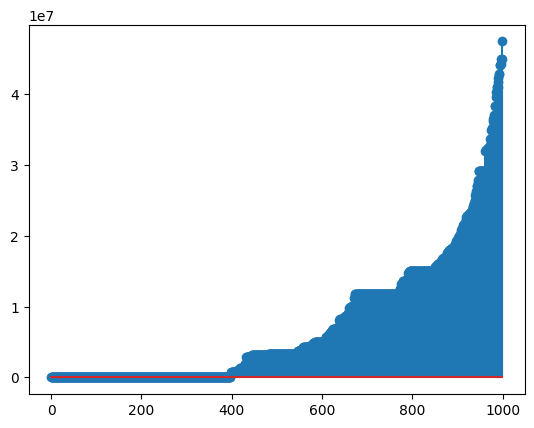

Average fitness: 7299228.278

Most fit grid:
A W Y X F
O U E U A
H F R T J
O F N A D
F U P D L
['IOWA', 'OHIO', 'TEXAS', 'UTAH']
47406938
GENERATION 1


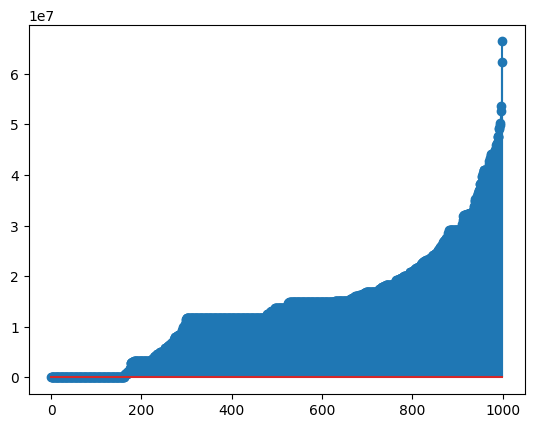

Average fitness: 14248462.09

Most fit grid:
  H Y B D
V E E T J
E S A O L
S N K I H
S G P D  
['ALASKA', 'ARKANSAS', 'IDAHO', 'INDIANA', 'IOWA', 'KANSAS', 'OHIO', 'TENNESSEE', 'TEXAS']
66353591
GENERATION 2


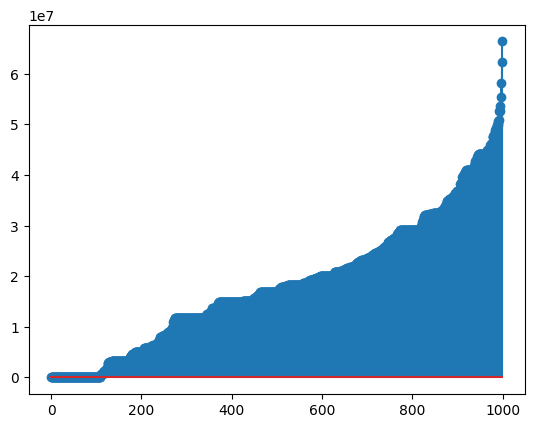

Average fitness: 18378678.356

Most fit grid:
  H Y B D
V E E T J
E S A O L
S N K I H
S G P D  
['ALASKA', 'ARKANSAS', 'IDAHO', 'INDIANA', 'IOWA', 'KANSAS', 'OHIO', 'TENNESSEE', 'TEXAS']
66353591
GENERATION 3


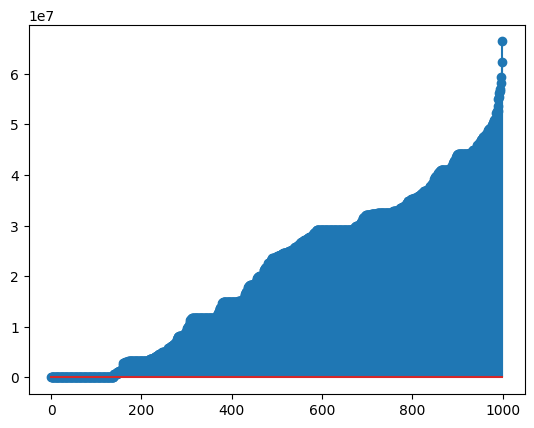

Average fitness: 21363591.343

Most fit grid:
  H Y B D
V E E T J
E S A O L
S N K I H
S G P D  
['ALASKA', 'ARKANSAS', 'IDAHO', 'INDIANA', 'IOWA', 'KANSAS', 'OHIO', 'TENNESSEE', 'TEXAS']
66353591
GENERATION 4


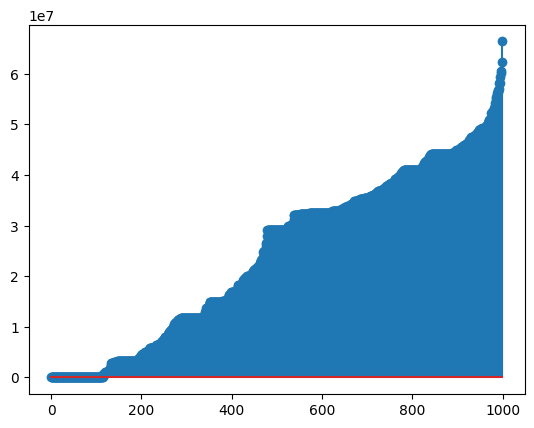

Average fitness: 24256763.186

Most fit grid:
  H Y B D
V E E T J
E S A O L
S N K I H
S G P D  
['ALASKA', 'ARKANSAS', 'IDAHO', 'INDIANA', 'IOWA', 'KANSAS', 'OHIO', 'TENNESSEE', 'TEXAS']
66353591
GENERATION 5


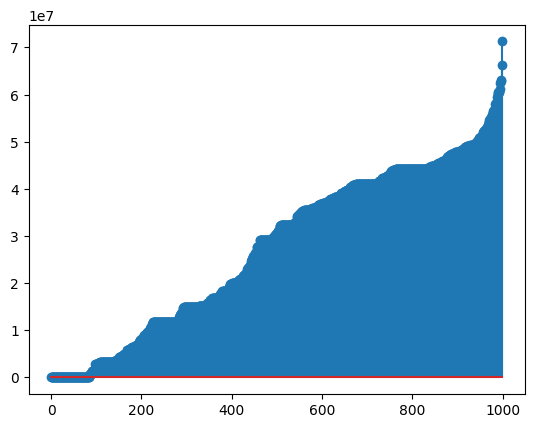

Average fitness: 27220398.301

Most fit grid:
J M U L N
X H D C X
N A R O L
V I Y X F
O Z J Y V
['ARIZONA', 'COLORADO', 'FLORIDA', 'INDIANA', 'IOWA', 'NEVADA', 'OHIO', 'UTAH', 'VIRGINIA']
71246371
GENERATION 6


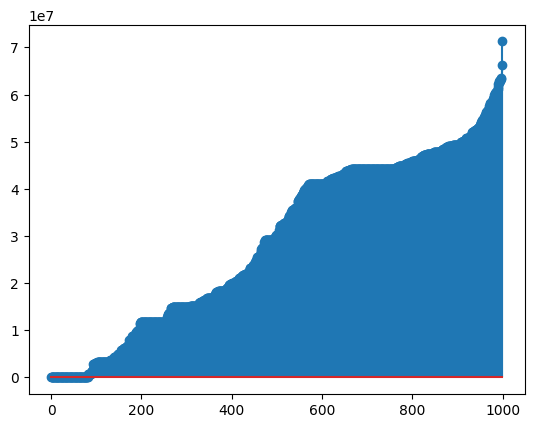

Average fitness: 28774267.704

Most fit grid:
J M U L N
X H D C X
N A R O L
V I Y X F
O Z J Y V
['ARIZONA', 'COLORADO', 'FLORIDA', 'INDIANA', 'IOWA', 'NEVADA', 'OHIO', 'UTAH', 'VIRGINIA']
71246371
GENERATION 7


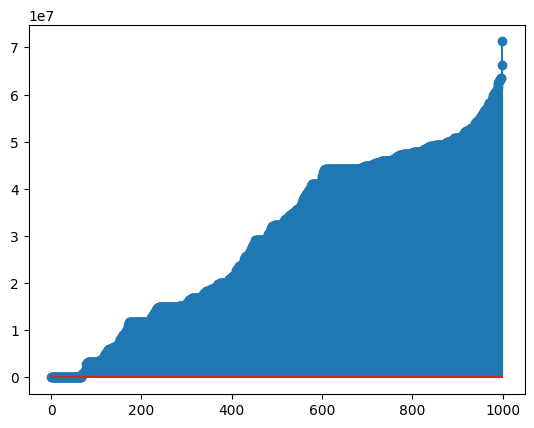

Average fitness: 30047067.966

Most fit grid:
J M U L N
X H D C X
N A R O L
V I Y X F
O Z J Y V
['ARIZONA', 'COLORADO', 'FLORIDA', 'INDIANA', 'IOWA', 'NEVADA', 'OHIO', 'UTAH', 'VIRGINIA']
71246371
GENERATION 8


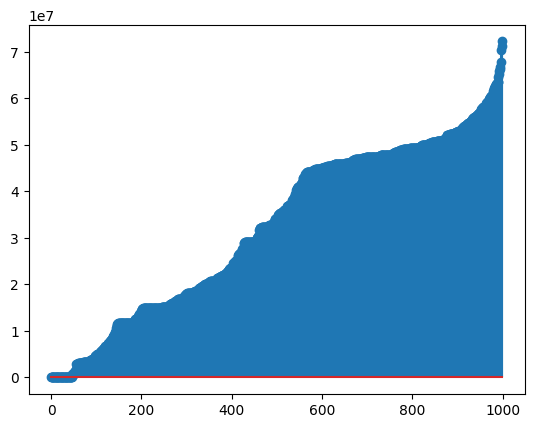

Average fitness: 32075247.603

Most fit grid:
R H I J T
O U A T W
A X N U G
K A I I R
M S Z O O
['ALASKA', 'HAWAII', 'IDAHO', 'INDIANA', 'IOWA', 'KANSAS', 'MAINE', 'MONTANA', 'OHIO', 'TEXAS', 'UTAH', 'VIRGINIA']
72236091
GENERATION 9


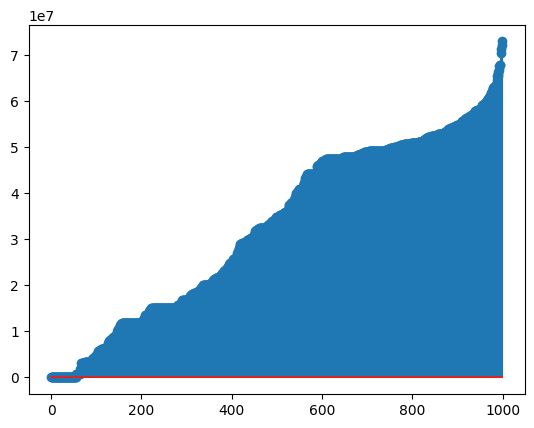

Average fitness: 32694980.883

Most fit grid:
P G R R J
O I A P U
N P X T M
S A D O Y
I A B H I
['ARIZONA', 'INDIANA', 'IOWA', 'KANSAS', 'OHIO', 'TEXAS', 'UTAH', 'VIRGINIA']
72913241
GENERATION 10


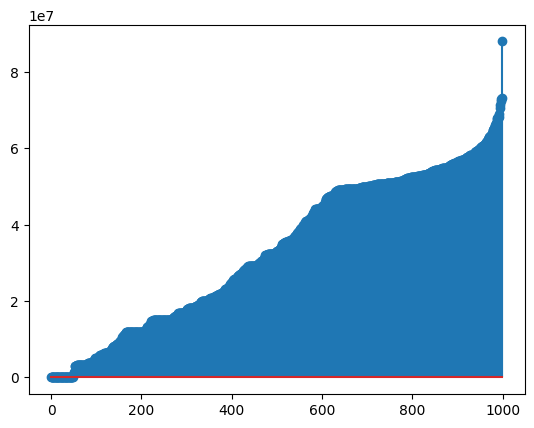

Average fitness: 32921324.946

Most fit grid:
A K M E N
G I O O K
W R V R Y
W E T M S
N J R A  
['GEORGIA', 'IOWA', 'NEWYORK', 'OHIO', 'OREGON', 'TEXAS', 'VIRGINIA']
87917128


In [9]:
generation = 0
population = [Grid.init_rand(5,5) for _ in range(POPULATION_SIZE)]
population.sort(key=lambda g:g.fitness)
most_fit = population[-1]
highest_fitnesses = []

while most_fit.fitness < TERMINAL_FITNESS and generation < MAX_GENERATIONS:
    print(f"GENERATION {generation}")
    highest_fitnesses.append(most_fit.fitness)
    population_fitness_statistics(population=population)
    print_individual(most_fit, "Most fit")
    population = propagate_next_generation(population, int(POPULATION_SIZE*GENERATION_CUTOFF))
    population.sort(key=lambda g:g.fitness)
    most_fit = population[-1]
    generation += 1

print()
plot_fitnesses_over_gens(highest_fitnesses)
print()
